##### Trabajo Semanal 5

En esta tarea semanal analizaremos un fenómeno muy particular que se da al calcular la DFT, el efecto de desparramo espectral.
Luego, haremos el siguiente experimento:

Senoidal de frecuencia f0=k0∗fS/N=k0.Δf potencia normalizada, es decir energía (o varianza) unitaria.
Se pide:

a) Sea k0={N/4,N/4+0.25,N/4+0.5}. Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

Inclusión de librerías

In [17]:
# -*- coding: utf-8 -*-
"""

@author: Hugo Alejandro Gomez

Descripción:
------------
Tarea semanal N°5
Desparramo espectral
"""

#%%  Librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig



Definimos las funciones que vamos a utilizar

In [18]:
#%%  Definición de funciones a utilizar

def funcionSeno (vmax, dc, ff, ph, nn, fs):
    
    # Grilla de sampleo temporal
    #tt = np.arange(0.0, nn/fs, 1/fs)
    tt = np.linspace(0, (nn-1)*(1/fs), nn)
    # Calculo de los valores punto a punto de la funcion
    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc
    
    #return tt,xx
    return xx
    

Inicialización de variables

In [19]:
#%% Cálculos
# Inicialización de variables 
# Datos generales de la simulación
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

T = N/fs

k0 = N*(1/8)
k1 = k0+0.25 #equivalente a k0+0.75 pero del bins adyacente
k2 = k0+0.5 #mas medio bins, peor sintonía

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral
 
f0= k0*df
f1 = k1*df
f2 = k2*df
zero_padding = 0


Simulación

In [20]:
#%% Acá arranca la simulación
#Grillas temporales
tt = np.linspace(0, (N-1)*ts, N)
#Grillas frecuenciales
ff = np.linspace(0, (N-1)*(df), (zero_padding+1)*N) #zero_padding veces N + N de la señal

bfrec = ff <= fs/2

amp = np.sqrt(2)

analog_sig0 = funcionSeno( vmax=amp, dc=0, ff=f0, ph=0, nn=N, fs=fs)
analog_sig1 = funcionSeno( vmax=amp, dc=0, ff=f1, ph=0, nn=N, fs=fs)
analog_sig2 = funcionSeno( vmax=amp, dc=0, ff=f2, ph=0, nn=N, fs=fs)

#Agrego N ceros

analog_sig0 = np.append(analog_sig0, np.zeros(zero_padding*N)) #zero_padding veces N + N de la señal
analog_sig1 = np.append(analog_sig1, np.zeros(zero_padding*N))
analog_sig2 = np.append(analog_sig2, np.zeros(zero_padding*N))


#Transformadas de Fourier
#ft_As0 = np.fft.fft(analog_sig0) / analog_sig0.shape[0]
# ft_As0 = np.fft.fft(analog_sig0) * (1/N)
# ft_As1 = np.fft.fft(analog_sig1) * (1/N)
# ft_As2 = np.fft.fft(analog_sig2) * (1/N)

ft_As0 = np.fft.fft(analog_sig0) / analog_sig0.shape[0]
ft_As1 = np.fft.fft(analog_sig1) / analog_sig1.shape[0]
ft_As2 = np.fft.fft(analog_sig2) / analog_sig2.shape[0]

#Varianza
var_As = np.var(analog_sig0)

area0 = np.sum(2*np.abs(ft_As0[bfrec])**2)
area1 = np.sum(2*np.abs(ft_As1[bfrec])**2)
area2 = np.sum(2*np.abs(ft_As2[bfrec])**2)


Presentación gráfica de los resultados

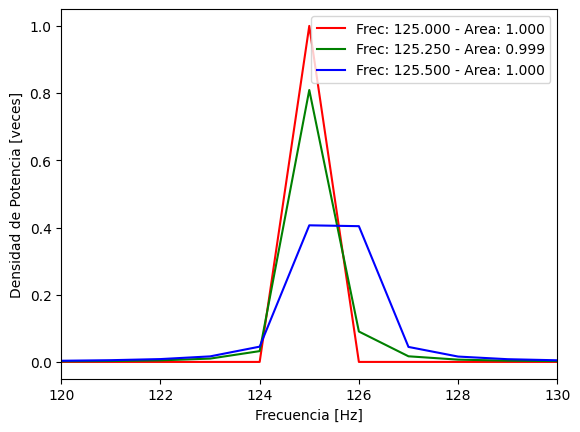

In [21]:
#%% Presentación gráfica de los resultados
plt.close('all')
plt.figure(1)

#Ejemplo de etiqueta\ Entre $ LaTeX / frac o dfrac
#label = '$|frac{N}{4} + {:3.3f}'$ Area = {:3.3f}'.format((N/4)+0.0, area0)
#label="freq = {:3.3f} Area {:3.3f}".format(freq,Area)


#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As0[bfrec])**2),'r', label = '$\frac{N}{4}$' + 'Area = {:3.3f}'.format(area0))
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As0[bfrec])**2),'r')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As1[bfrec])**2),'g')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As2[bfrec])**2),'b')
plt.plot( ff[bfrec], 2*np.abs(ft_As0[bfrec])**2,'r', label='Frec: {:3.3f} - Area: {:3.3f}'.format(f0,area0))
plt.plot( ff[bfrec], 2*np.abs(ft_As1[bfrec])**2,'g', label='Frec: {:3.3f} - Area: {:3.3f}'.format(f1,area1))
plt.plot( ff[bfrec], 2*np.abs(ft_As2[bfrec])**2,'b', label='Frec: {:3.3f} - Area: {:3.3f}'.format(f2,area2))

axes_hdl = plt.gca()
axes_hdl.legend()
plt.ylabel('Densidad de Potencia [veces]')
#plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.xlim([120,130])
plt.show()
 

Ahora utilizamos la técnica de zero padding

In [22]:
zero_padding = 10

In [27]:
#%% Simulación con zero padding
#Grillas temporales
tt = np.linspace(0, (N-1)*ts, N)
#Grillas frecuenciales
ff = np.linspace(0, (N-1)*(df), (zero_padding+1)*N) #zero_padding veces N + N de la señal

bfrec = ff <= fs/2

#Normalizamos para potencia unitaria
amp = np.sqrt(2*(zero_padding+1))

analog_sig0 = funcionSeno( vmax=amp, dc=0, ff=f0, ph=0, nn=N, fs=fs)
analog_sig1 = funcionSeno( vmax=amp, dc=0, ff=f1, ph=0, nn=N, fs=fs)
analog_sig2 = funcionSeno( vmax=amp, dc=0, ff=f2, ph=0, nn=N, fs=fs)

#Agrego N ceros

analog_sig0 = np.append(analog_sig0, np.zeros(zero_padding*N)) #zero_padding veces N + N de la señal
analog_sig1 = np.append(analog_sig1, np.zeros(zero_padding*N))
analog_sig2 = np.append(analog_sig2, np.zeros(zero_padding*N))


#Transformadas de Fourier
#ft_As0 = np.fft.fft(analog_sig0) / analog_sig0.shape[0]
# ft_As0 = np.fft.fft(analog_sig0) * (1/N)
# ft_As1 = np.fft.fft(analog_sig1) * (1/N)
# ft_As2 = np.fft.fft(analog_sig2) * (1/N)

ft_As0 = np.fft.fft(analog_sig0) / analog_sig0.shape[0]
ft_As1 = np.fft.fft(analog_sig1) / analog_sig1.shape[0]
ft_As2 = np.fft.fft(analog_sig2) / analog_sig2.shape[0]

#Varianza
var_As = np.var(analog_sig0)

area0 = np.sum(2*np.abs(ft_As0[bfrec])**2)
area1 = np.sum(2*np.abs(ft_As1[bfrec])**2)
area2 = np.sum(2*np.abs(ft_As2[bfrec])**2)


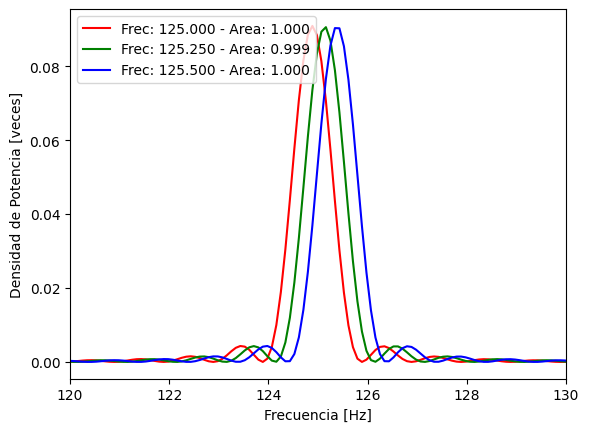

In [28]:
#%% Presentación gráfica de los resultados
plt.close('all')
plt.figure(2)


#plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As0[bfrec])**2),'r', label = '$\frac{N}{4}$' + 'Area = {:3.3f}'.format(area0))
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As0[bfrec])**2),'r')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As1[bfrec])**2),'g')
# plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As2[bfrec])**2),'b')
plt.plot( ff[bfrec], 2*np.abs(ft_As0[bfrec])**2,'r', label='Frec: {:3.3f} - Area: {:3.3f}'.format(f0,area0))
plt.plot( ff[bfrec], 2*np.abs(ft_As1[bfrec])**2,'g', label='Frec: {:3.3f} - Area: {:3.3f}'.format(f1,area1))
plt.plot( ff[bfrec], 2*np.abs(ft_As2[bfrec])**2,'b', label='Frec: {:3.3f} - Area: {:3.3f}'.format(f2,area2))

axes_hdl = plt.gca()
axes_hdl.legend()
plt.ylabel('Densidad de Potencia [veces]')
#plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.xlim([120,130])
plt.show()
 

_Conclusiones_


Cuando se grafica con k0=N/4 se aprecia bien la delta pero al graficar con N/4 + 0,25 y N/4 + 0.5 se ve mas deformado por el hecho de que no son múltiplos enteros de la resolución espectral. Al no serlos, no hay una proyección perfecta sobre las bases ortonormales. Una forma de solucionar la visualización es mediante la técnica de zero padding, en donde de cierta manera se genera una mayor ventana para mostrar la señal agregando valores nulos a la señal. Es una manera de agregarle resolución manteniendo el mismo ciclo activo.